# Выбор локации для скважины
## Описание проекта
Нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 


Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.
## Цель проекта
Определить самый выгодный регион для бурения скважин.
## Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Описание данных
Представлены данные геологоразведки трёх регионов.

`id` — уникальный идентификатор скважины;

`f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);

`product` — объём запасов в скважине (тыс. баррелей).
## Последовательность шагов проекта
1. Загрузка и исследование датасетов.
2. Предобработка данных.
3. Построение и проверка моделей.
4. Расчет прибыли и рисков.
5. Выбор и обоснование локации для скважины.

## 1. Загрузка и исследование данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st

plt.style.use('dark_background')

In [2]:
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv(r'D:\Учеба\Data Scientist\Проекты\ML в бизнесе\geo_data_0.csv')
    geo_data_1 = pd.read_csv(r'D:\Учеба\Data Scientist\Проекты\ML в бизнесе\geo_data_1.csv')
    geo_data_2 = pd.read_csv(r'D:\Учеба\Data Scientist\Проекты\ML в бизнесе\geo_data_2.csv')

In [3]:
display(geo_data_0.head())
display(geo_data_1.head())
display(geo_data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
display(geo_data_0.info())
display(geo_data_1.info())
display(geo_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
display(geo_data_0.describe())
display(geo_data_1.describe())
display(geo_data_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

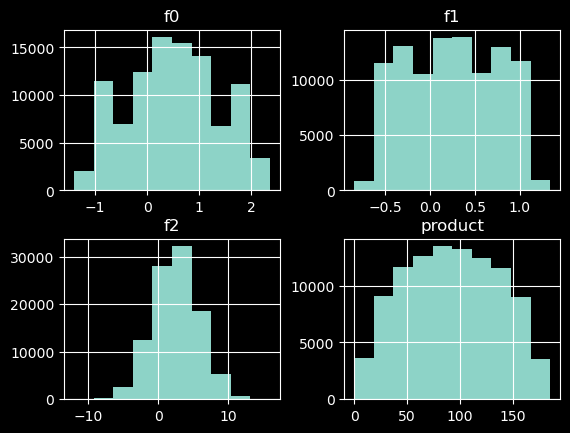

In [6]:
geo_data_0.hist()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

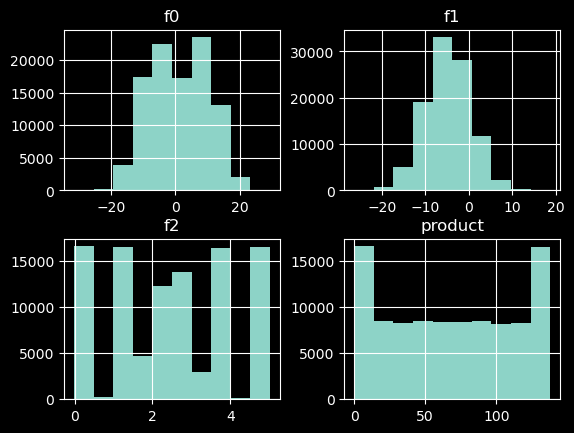

In [7]:
geo_data_1.hist()

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

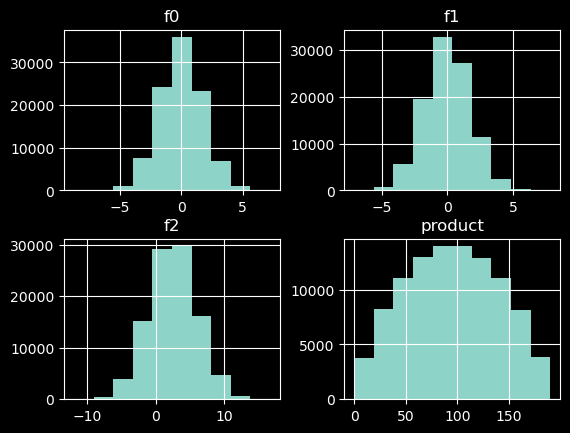

In [8]:
geo_data_2.hist()

In [9]:
display(geo_data_0.corr())
display(geo_data_1.corr())
display(geo_data_2.corr())

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


In [10]:
display(geo_data_0.duplicated().sum())
display(geo_data_1.duplicated().sum())
display(geo_data_2.duplicated().sum())

0

0

0

In [11]:
display(geo_data_0['id'].duplicated().sum())
display(geo_data_1['id'].duplicated().sum())
display(geo_data_2['id'].duplicated().sum())

10

4

4

### Вывод
В исходных данных отсутствуют пропуски, но есть дубликаты id. Требуется предобработка. Распределения параметров для разных регионов сильно отличаются. Целевой признак в 1 и 3 датасетах распределены нормально, во 2 датасете распределение отличается от нормального. Корреляции между оценочными признаками в данных не обнаружено. Есть корреляция между признаком f2 и целевым признаком, во втором датасете она равна единице. Будет решаться задача регрессии (обучение с учителем).

## 2. Устранение дубликатов
В данных обнаружены дубликаты id. Признаков того, какая из строк дубликатов является корректной нет. Возможно, проводилась переоценка запасов, поэтому следует оставить последнее из значений.

In [12]:
geo_data_0.drop_duplicates(subset=['id'], keep='last', inplace=True)
geo_data_1.drop_duplicates(subset=['id'], keep='last', inplace=True)
geo_data_2.drop_duplicates(subset=['id'], keep='last', inplace=True)

display(geo_data_0['id'].duplicated().sum())
display(geo_data_1['id'].duplicated().sum())
display(geo_data_2['id'].duplicated().sum())

0

0

0

### Вывод
Дубликаты в столбце с id устранены. Сохранено последнее для каждого дубликата

## 3. Построение и проверка моделей
Напишем функцию для разбиения данных на тренировочную и тестовую выборки и тренировки модели линейной регрессии.

In [13]:
def lr_model_training(data):
    # делим выборку на features и target. 
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    
    # Разбиваем на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                        train_size=0.75, random_state=10)
    display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    # тренируем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Средние запасы по предсказаниям в регионе: {predictions.mean():.3}')
    print(f'RMSE = {mean_squared_error(predictions, y_test) ** 0.5:.3}')
    
    # возвращаем целевые значения тестовой выборки и предсказания
    return y_test, predictions

Вызовем функцию последовательно для всех трех регионов и сохраним реальные значения и предсказания в переменные

In [14]:
y_test_0, predictions_0 = lr_model_training(geo_data_0)

(74992, 3)

(24998, 3)

(74992,)

(24998,)

Средние запасы по предсказаниям в регионе: 92.5
RMSE = 37.8


In [15]:
y_test_1, predictions_1 = lr_model_training(geo_data_1)

(74997, 3)

(24999, 3)

(74997,)

(24999,)

Средние запасы по предсказаниям в регионе: 68.7
RMSE = 0.891


In [16]:
y_test_2, predictions_2 = lr_model_training(geo_data_2)

(74997, 3)

(24999, 3)

(74997,)

(24999,)

Средние запасы по предсказаниям в регионе: 95.2
RMSE = 39.9


### Вывод
Самые высокие средние запасы модели предсказали в 3 и 1 регионах (порядка 90-95 тыс. барелей), но в них также высокая средняя ошибка предсказания (около 40 тыс. барелей). Во втором регионе запасы ниже (69 тыс. барелей) и ошибка предсказания низкая (около 1 тыс. барелей).

## 4. Расчет прибыли и рисков
### 4.1. Расчет точки безубыточности
Запишем предоставленные макропараметры в переменные

In [17]:
# бюджет разработки месторождения
BUDGET = 1e10
# количество точек для разработки в одном регионе
WELLS = 200
# доход с 1 ед. в целевом признаке (1 тыс. барелей)
MARGIN = 450e3

Найдем запасы в точке безубыточности разработки скважины при текущих параметрах. Для этого разделим бюджет на маржинальный доход и количество разрабатываемых скважин

In [18]:
volume = BUDGET / (MARGIN * WELLS)
print(f'Требуемые запасы месторождения для безубыточной разработки: {volume:.5}, тыс. барелей на скважину')

Требуемые запасы месторождения для безубыточной разработки: 111.11, тыс. барелей на скважину


#### Вывод
Требуемые запасы в скважине для безубыточной разработки составляют 111 тыс. барелей. Это значение выше средних запасов в рассматриваемых регионах.

### 4.2. Прибыль и риски убытков по регионам
Напишем функцию, которая будет принимать на вход предсказания модели и возвращать прибыль для 200 скважин

In [19]:
def profit_calc(target, predict):
    # сортируем предсказания
    predict_sorted = predict.sort_values(ascending=False)
    # берем соответствующие им по индексам реальные значения    
    target_sorted = target[predict_sorted.index][:WELLS]
    
    product = target_sorted.sum()
    return product * MARGIN - BUDGET  

Теперь напишем функцию бутстрепа, которая будет принимать на вход данные о предсказаниях, размер выборки и количество итераций. Функция будет брать из данных выборку (в нашем случае 500 элементов), применять функцию расчета прибыли и возвращать список результатов.

In [20]:
def bootstrap(target, predictions, sample_size, iterations):
    state = np.random.RandomState(10)
    result = []
    predictions = pd.Series(predictions, target.index)
    
    for _ in range(iterations):
        # берем выборку из целевых значений
        subsample_target = pd.Series(target).sample(n=sample_size, 
                                                         replace=True, random_state=state)
        
        subsample_target = pd.Series(subsample_target)
        # берем выборку из предсказанных значений с такими же индексами
        subsample_predict = predictions[subsample_target.index]
        profit = profit_calc(subsample_target, subsample_predict)
        result.append(profit)
    result = pd.Series(result)
    
    # Печатаем среднее значение прибыли от разработки месторождений
    print(f'Средняя прибыль равна:, {result.mean():.2E}')
    # Ищем 95%-й доверительный интервал
    print(f'95%-й доверительный интервал:, {result.quantile(0.025):.2E}, {result.quantile(0.975):.2E}')
    # Считаем риск убытков
    print(f'Риск убытков в регионе составляет: {(result < 0).mean():.2%}')
    
    return result

#### a. Первый регион

Применим функции для получения распределения прибыли по первому региону в соответствии с условиями

Средняя прибыль равна:, 4.35E+08
95%-й доверительный интервал:, -1.24E+08, 9.55E+08
Риск убытков в регионе составляет: 5.40%


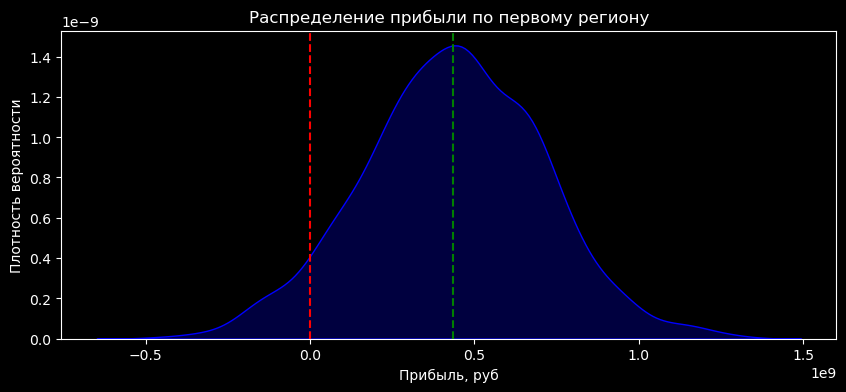

In [21]:
geo_0 = bootstrap(y_test_0, predictions_0, sample_size=500, iterations=1000)
geo_0 = pd.Series(geo_0)
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data=geo_0, fill=True, color='blue')
# Добавим вертикальную линию с суммой бюджета,
# которая отражает точку безубыточности
ax.axvline(0, ls='--', color='red')
# Также добавим среднее распределения на график
ax.axvline(geo_0.mean(), ls='--', color='green')
ax.set_title('Распределение прибыли по первому региону')
ax.set_xlabel('Прибыль, руб')
ax.set_ylabel('Плотность вероятности')
plt.show()

#### b. Второй регион

Применим функции для получения распределения прибыли по второму региону в соответствии с условиями

Средняя прибыль равна:, 4.97E+08
95%-й доверительный интервал:, 7.02E+07, 9.16E+08
Риск убытков в регионе составляет: 1.00%


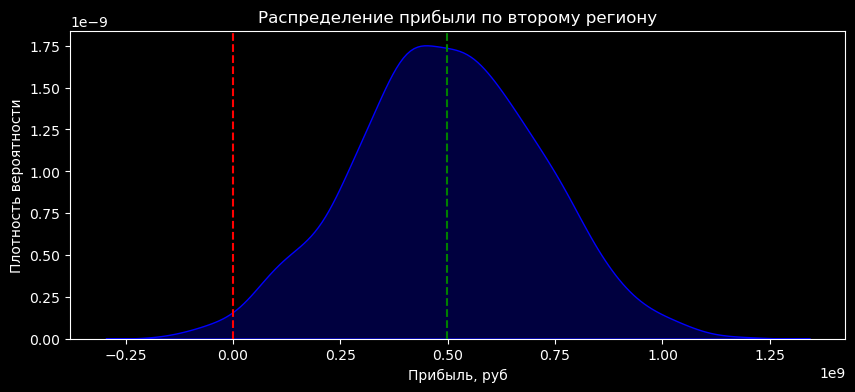

In [22]:
geo_1 = bootstrap(y_test_1, predictions_1, sample_size=500, iterations=1000)
geo_1 = pd.Series(geo_1)
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data=geo_1, fill=True, color='blue')
# Добавим вертикальную линию с суммой бюджета,
# которая отражает точку безубыточности
ax.axvline(0, ls='--', color='red')
# Также добавим среднее распределения на график
ax.axvline(geo_1.mean(), ls='--', color='green')
ax.set_title('Распределение прибыли по второму региону')
ax.set_xlabel('Прибыль, руб')
ax.set_ylabel('Плотность вероятности')
plt.show()

#### c. Третий регион

Применим функции для получения распределения прибыли по третьему региону в соответствии с условиями

Средняя прибыль равна:, 4.01E+08
95%-й доверительный интервал:, -1.36E+08, 9.86E+08
Риск убытков в регионе составляет: 8.00%


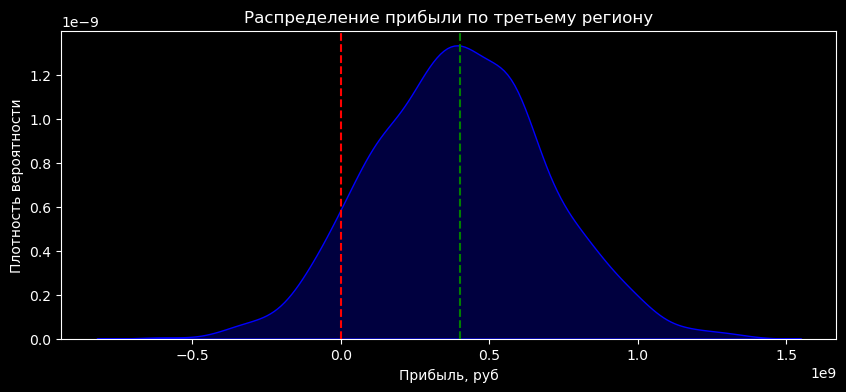

In [23]:
geo_2 = bootstrap(y_test_2, predictions_2, sample_size=500, iterations=1000)
geo_2 = pd.Series(geo_2)
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data=geo_2, fill=True, color='blue')
# Добавим вертикальную линию с суммой бюджета,
# которая отражает точку безубыточности
ax.axvline(0, ls='--', color='red')
# Также добавим среднее распределения на график
ax.axvline(geo_2.mean(), ls='--', color='green')
ax.set_title('Распределение прибыли по третьему региону')
ax.set_xlabel('Прибыль, руб')
ax.set_ylabel('Плотность вероятности')
plt.show()

#### Вывод
Расчет рисков и прибыли для трех регионов показал, что для первого региона средняя прибыль от разработки составляет 435 млн руб., а риск убытков - 5.4%, для второго - 497 млн руб. и 1.0% и для третьего - 401 млн руб. и 8.0% соответственно. В 1 и 3 регионах риск убытков превышает требуемый порог в 2.5%, поэтому они исключаются из рассмотрения.

## Заключение
В исследовании были изучены данные по трем регионам потенциальной разработки месторождений нефти. В исходных данных отсутствуют пропуски значений, но есть дубликаты в столбце id. Дубликаты удалены, сохранено последнее из значений. Распределения параметров значительно различаются по регионам. Для каждого региона была построена модель линейной регрессии на 75% данных и применена для предсказания целевого признака (запасов) на осташемся объеме данных. Самые высокие средние запасы модели предсказали в 3 и 1 регионах (порядка 90-95 тыс. барелей), но в них также высокая средняя ошибка предсказания (около 40 тыс. барелей). Во втором регионе запасы ниже (69 тыс. барелей) и ошибка предсказания низкая (около 1 тыс. барелей).

Расчет точки безубыточности проекта показал, что при бюджете в 10 млрд руб. требуется, чтобы запасы скважины в среднем составляли 111 тыс. барелей. Расчет рисков и прибыли для трех регионов показал, что для первого региона средняя прибыль от разработки составляет 435 млн руб., а риск убытков - 5.4%, для второго - 497 млн руб. и 1.0% и для третьего - 401 млн руб. и 8.0% соответственно. В 1 и 3 регионах риск убытков превышает требуемый порог в 2.5%, поэтому они исключаются из рассмотрения.

Таким образом, для разработки месторождений следует выбирать второй регион, т.к. он единственный соответствует требованиям по риску убытков и к тому же имеет самую высокую среднюю прибыль.